<a href="https://colab.research.google.com/github/siddharth-agarwal/wqu-capstone-group26/blob/main/WQU_final_project_crude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install EIA_python
import numpy as np
import yfinance as yf
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

import statsmodels.api as sm
import pylab as py

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Retrieving price data for refined products

In [ ]:
import eia
api_key = "EzN5B4AudWBVZWJrv2Z23hhFm3SmKagtM1MmeZvD"
api = eia.API(api_key)

In [ ]:
def getEIAdata(series_name):
  series_search = api.data_by_series(series=series_name)
  df = pd.DataFrame(series_search)
  df.index = pd.to_datetime(df.index.str.slice(0, 9), format='%Y %m%d')
  return(df)

refined_products = ['PET.EER_EPMRR_PF4_Y05LA_DPG.D', 'PET.EER_EPLLPA_PF4_Y44MB_DPG.D', 'PET.EER_EPD2F_PE1_Y35NY_DPG.D'] # RBOB gasoline, propane, heating oil

ref_prod = pd.DataFrame()

for prod in refined_products:
  df = getEIAdata(prod)
  ref_prod = pd.concat([ref_prod, df], axis=1)

In [ ]:
ref_prod = ref_prod.loc['2015-01-01':'2020-12-31'] # subset to the date range we're interested in 

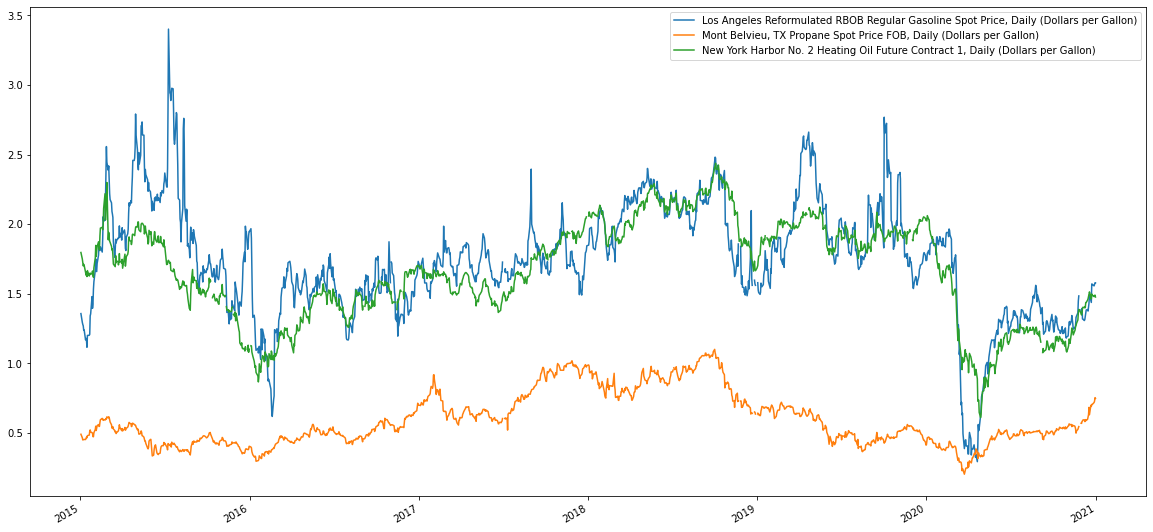

In [ ]:
ref_prod.plot(figsize=(20,10))

## Retreiving price data for crude

In [ ]:
start_dt =dt.date(2015,1,1)
end_dt =dt.date(2020,12,31)

In [ ]:
# oil = ['CL=F', 'BZ=F'] # US crude and Brent crude 
# df= yf.download(oil, start=start_dt, end=end_dt, progress=False) ['Close']
# oil_df = df.resample('W').mean()
# oil_df.head()

oil = ['PET.RWTC.D', 'PET.RBRTE.D '] # WTI crude, Brent crude

oil_df = pd.DataFrame()

for prod in oil:
  df = getEIAdata(prod)
  oil_df = pd.concat([oil_df, df], axis=1)

oil_df = oil_df.loc['2015-01-01':'2020-12-31'] # subset to the date range we're interested in 

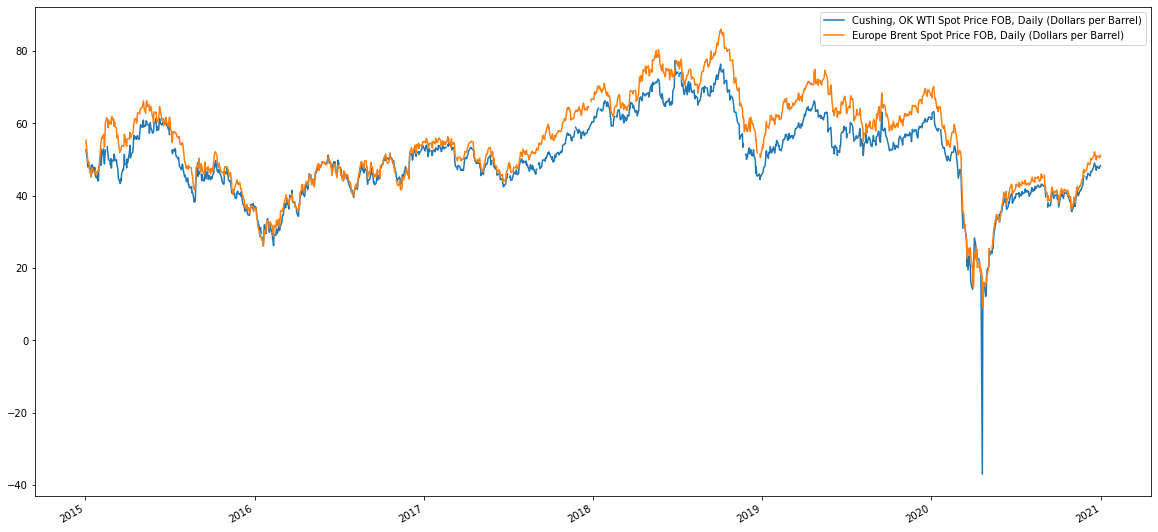

In [ ]:
oil_df.plot(figsize=(20,10))

In [ ]:
returns_df = oil_df.pct_change()
returns_df.head(10)

,"Cushing, OK WTI Spot Price FOB, Daily (Dollars per Barrel)","Europe Brent Spot Price FOB, Daily (Dollars per Barrel)"
2015-01-02,NaN,NaN
2015-01-05,-0.050645,-0.077645
2015-01-06,-0.041359,-0.018794
2015-01-07,0.014798,-0.021149
2015-01-08,0.002259,0.007542
2015-01-09,-0.009221,-0.036213
2015-01-12,-0.047363,-0.015533
2015-01-13,-0.003040,-0.037740
2015-01-14,0.055967,0.015289
2015-01-15,-0.043720,0.040157


# 4	Data Summaries.


In [ ]:
rets_stat_df=pd.DataFrame(index=returns_df.columns)
rets_stat_df['Mean']=returns_df.mean()
rets_stat_df['Std dev']=returns_df.std()
rets_stat_df['Skewness']=returns_df.skew()
rets_stat_df['Kurtosis']=returns_df.kurt()
rets_stat_df


,Mean,Std dev,Skewness,Kurtosis
"Cushing, OK WTI Spot Price FOB, Daily (Dollars per Barrel)",-0.001710,0.090860,-25.190469,812.945178
"Europe Brent Spot Price FOB, Daily (Dollars per Barrel)",0.000569,0.034833,0.895269,63.951282


In [ ]:
fig=px.line(returns_df)
plt.show()

## Testing Stationarity (Dickey-Fuller)

In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

def test_stationarity(timeseries):
  #Perform Dicky-Fuller Test
  print('Results of Dickey-Fuller Test')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
      dfoutput['Critical Value (%s) '%key] = value
  print(dfoutput)

test_stationarity(returns_df['Cushing, OK WTI Spot Price FOB, Daily (Dollars per Barrel)'].dropna())

Results of Dickey-Fuller Test
Test Statistic                -9.351591e+00
p-value                        8.267712e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.522000e+03
Critical Value (1%)           -3.434654e+00
Critical Value (5%)           -2.863441e+00
Critical Value (10%)          -2.567782e+00
dtype: float64


In [ ]:
test_stationarity(returns_df['Europe Brent Spot Price FOB, Daily (Dollars per Barrel)'].dropna())

Results of Dickey-Fuller Test
Test Statistic                -8.463471e+00
p-value                        1.544807e-13
#Lags Used                     1.300000e+01
Number of Observations Used    1.530000e+03
Critical Value (1%)           -3.434631e+00
Critical Value (5%)           -2.863431e+00
Critical Value (10%)          -2.567777e+00
dtype: float64


Both US crude and Brent crude appear to be stationary based on the Dickey-Fuller test.

## Testing Cointegration (Johansen test)

In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

all_price_series = pd.concat([ref_prod.pct_change().dropna(), returns_df.dropna()], axis=1).dropna()


In [ ]:
def get_johansen(y, p):
  """
  Get the cointegration vectors at 95% level of significance
  given by the trace statistic test.
  """

  N, l = y.shape
  jres = coint_johansen(y, 0, p)
  trstat = jres.lr1                       # trace statistic
  tsignf = jres.cvt                       # critical values

  for i in range(l):
      if trstat[i] > tsignf[i, 1]:     # 0: 90%  1:95% 2: 99%
          r = i + 1
  jres.r = r
  jres.evecr = jres.evec[:, :r]

  return jres

In [ ]:
p=1
jres=get_johansen(all_price_series, 1)
print("There are ", jres.r, "cointegration vectors")
v1=jres.evecr[:,0]
v2=jres.evecr[:,1]
v3=jres.evec[:,2]
v4=jres.evec[:,3]
v5=jres.evec[:,4]
print(v1)
print(v2)
print(v3)
print(v4)
print(v5)

There are  5 cointegration vectors
[  4.91020119  -4.30542533  58.22313872  -6.50727284 -42.90681914]
[-24.61291466   7.94455342  41.29176485  -6.56501326  16.28602783]
[ -0.13472869 -47.53740345  17.5554597   -5.95300733  28.18956717]
[14.03294637 -5.82096682 42.86849615  6.492706   -9.51365775]
[-10.7419927  -18.96490149  21.06980785  10.45025961 -25.93297177]


Text(0.5, 1.0, 'v5 applied to all_price_series')

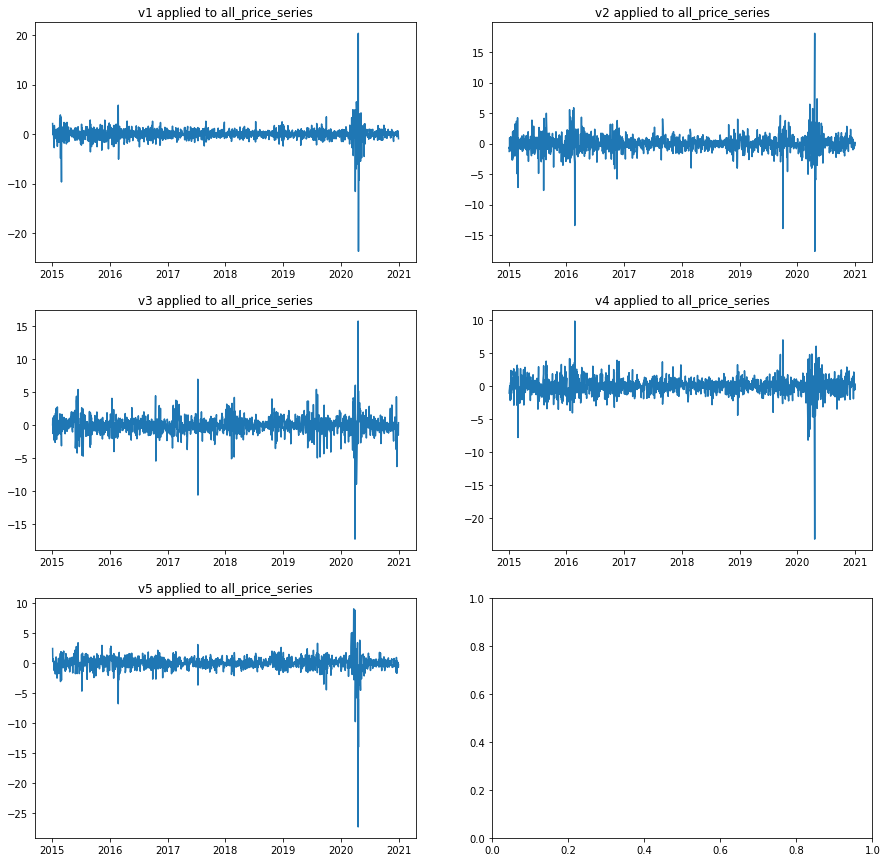

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
figure, axis = plt.subplots(3, 2)
axis[0, 0].plot(all_price_series.dot(v1))
axis[0, 1].plot(all_price_series.dot(v2))
axis[1, 0].plot(all_price_series.dot(v3))
axis[1, 1].plot(all_price_series.dot(v4))
axis[2, 0].plot(all_price_series.dot(v5))

axis[0, 0].set_title("v1 applied to all_price_series")
axis[0, 1].set_title("v2 applied to all_price_series")
axis[1, 0].set_title("v3 applied to all_price_series")
axis[1, 1].set_title("v4 applied to all_price_series")
axis[2, 0].set_title("v5 applied to all_price_series")

All of these time series are stationary - I(0).


## PCA Test

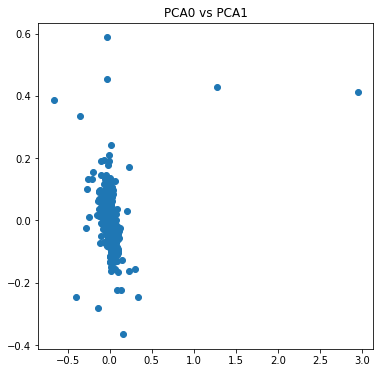

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px

pcamodel = PCA(n_components=3)
pca = pcamodel.fit_transform(all_price_series)

plt.rcParams["figure.figsize"] = (6,6)

plt.scatter(pca[:, 0], pca[:, 1])
plt.title("PCA0 vs PCA1")
plt.show() 

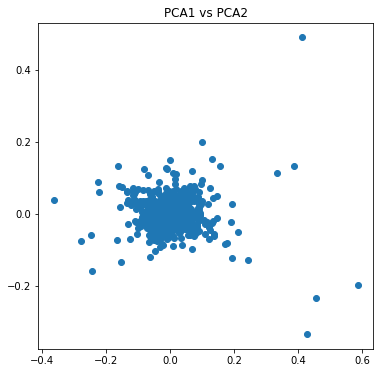

In [ ]:
plt.scatter(pca[:, 1], pca[:, 2])
plt.title("PCA1 vs PCA2")
plt.show() 

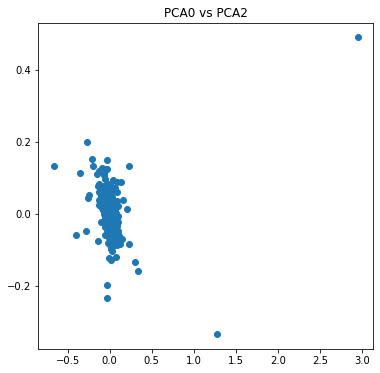

In [ ]:
plt.scatter(pca[:, 0], pca[:, 2])
plt.title("PCA0 vs PCA2")
plt.show() 

In [ ]:
print('Total explained variance:{}'.format(pcamodel.explained_variance_ratio_.sum() * 100))

Total explained variance:93.76646284511483


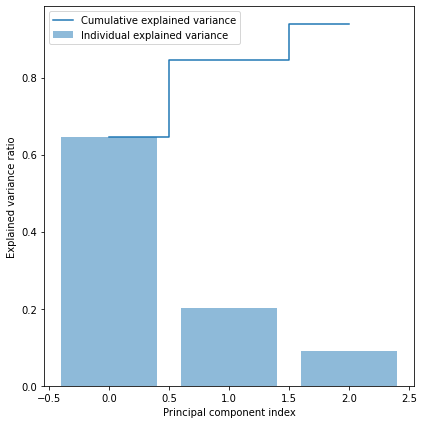

In [ ]:
exp_var_pca = pcamodel.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We see a relatively high explained variance from just 2 principal components (84%), which then jumps to 93% for the first 3 principal components. This shows the that dimensionality of the dataset can be reduced significantly based on the overall relationship of the data points.